# 1. EDA & Data preprocessing

In [4]:
#load libraries

import pandas as pd
import numpy as np
import os
import re

In [2]:
##load original dataset

df_orig = pd.read_csv('all_rt.csv', low_memory=False)

In [3]:
# A glance at the dataset

df_orig.head()

,Unnamed: 0,retailer,retailer_link,upc,internal_id,breadcrumb,brand,title,price,msrp,review_count,average_rating,image,description,how_to_use,ingredients,special_tags,warnings
0,1,Grove,https://www.grove.co/catalog/product/organic-s...,NaN,446,Personal Care / Skin Care & Grooming / Shaving...,Dr. Bronner\'s,Organic Shaving Soap,8.99,10.99,115,3.0,https://res.cloudinary.com/epantry/image/uploa...,"Get a close, comfortable shave with organic in...",These Organic Shaving Soaps are great for both...,"Organic Sucrose, Organic White Grape Juice, Or...","Biodegradable, BPA Free, Certified B-Corp, CFC...",NaN
1,2,Grove,https://www.grove.co/catalog/product/sunscreen...,NaN,926,Personal Care / Skin Care & Grooming / Suncare...,Babyganics,Sunscreen Lotion SPF 50,10.99,10.99,13,4.0,https://res.cloudinary.com/epantry/image/uploa...,"It’s a big, wide world out there and your baby...",Apply liberally and evenly 15 minutes before s...,"Active Ingredients: Octisalate - (5.0%), Titan...","Children/Pet Friendly, Fragrance Free, Hypoall...",NaN
2,3,Grove,https://www.grove.co/catalog/product/relax-lotion,NaN,1618,Personal Care / Skin Care & Grooming / Body & ...,Little Moon Essentials,Relax - Lotion,10.99,16.00,5,4.0,https://res.cloudinary.com/epantry/image/uploa...,Relax hand and body lotion is a floral fantasy...,Apply liberally as often as necessary. Treat y...,"Water (Aqua), Aloe Barbadensis Leaf Juice, Saf...","Made in the USA, Natural Fragrance, Not tested...",NaN
3,4,Grove,https://www.grove.co/catalog/product/elderberr...,NaN,542,Personal Care / Health & Wellness / Immunity,Zarbee\'s Naturals,Adult Elderberry Immune Support Gummies,17.95,19.99,27,4.0,https://res.cloudinary.com/epantry/image/uploa...,"When there\'s an important event coming up, se...",Take 3x daily as needed for adults. Works best...,"Elderberry Extract, Vitamin A, Vitamin C, Vita...","Gluten Free,",NaN
4,5,Grove,https://www.grove.co/catalog/product/wax-paper...,NaN,713,Household / Paper & Pantry / Food Prep & Storage,If You Care,Wax Paper - Unbleached,5.49,6.99,7,4.0,https://res.cloudinary.com/epantry/image/uploa...,Just like your mom\'s old favorite – only bett...,Ideal for wrapping foods without affecting fla...,Unbleached paper and coated with 100% natural ...,"Gluten Free, Not tested on animals, Vegan,",NaN


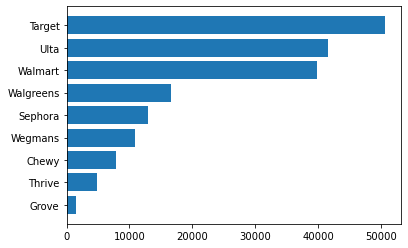

In [4]:
# The store-wise distribution of the data

import matplotlib.pyplot as plt
retailer_count = df_orig.retailer.value_counts(ascending=True)
plt.barh(range(len(retailer_count)), retailer_count)
plt.yticks(range(len(retailer_count)), retailer_count.index)
_ = plt.yticks
plt.savefig('retailer.png', dpi=300)


In [5]:
# Take a look at the target taxonomy

master_df = pd.read_excel('master_new.xlsx')
master_df.head()

,taxonomy_c1,taxonomy_c2,taxonomy_c3,taxonomy_c4,Unnamed: 4,full_taxonomy,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Baby,Mom & Pregnancy,Postpartum Care,NaN,NaN,"Baby,Mom & Pregnancy,Postpartum Care,,",NaN,NaN,NaN
1,Baby,Mom & Pregnancy,Pregnancy & Prenatal Care,Skincare,NaN,"Baby,Mom & Pregnancy,Pregnancy & Prenatal Care...",NaN,NaN,NaN
2,Baby,Mom & Pregnancy,Pregnancy & Prenatal Care,Prenatal Vitamin,NaN,"Baby,Mom & Pregnancy,Pregnancy & Prenatal Care...",NaN,NaN,NaN
3,Baby,Mom & Pregnancy,Pregnancy & Prenatal Care,Prenatal Supplement,NaN,"Baby,Mom & Pregnancy,Pregnancy & Prenatal Care...",NaN,NaN,NaN
4,Baby,Mom & Pregnancy,Pregnancy & Prenatal Care,Feminine Care,NaN,"Baby,Mom & Pregnancy,Pregnancy & Prenatal Care...",NaN,NaN,NaN


In [24]:
master_df.taxonomy_c1.value_counts().index

Index(['Grocery', 'Beauty', 'Pets', 'Personal Care', 'Baby', 'Household',
       'Health'],
      dtype='object')

In [15]:
##trim the original data_frame
'''
Input: input DataFrame
Return: dataframe with columns of ['retailer', 'category', 'brand', 'title', 'description']
'''
def dataframe_trim(orig_df):
    columns_to_keep = ['retailer', 'breadcrumb', 'brand', 'title', 'description']
    df=orig_df[columns_to_keep]
    df.columns = ['retailer', 'old_category', 'brand', 'title', 'description']
    df = df.dropna(subset=['old_category'])
    return df

In [16]:
df_trim = dataframe_trim(df_orig)

In [17]:
#clean the dataframe by droping rows with a null category
'''
1. without rows having null values in column 'category', 
2. replace the category strings with a format of 'A,B,C,' and drop 'Target' and 'Home Page'
Input: DataFrame
Return: Dataframe 
'''
def clean_df(dataframe):
    dataframe['category']  = dataframe.old_category.apply(lambda x:re.sub(r'^Target/', "", x))
    dataframe['category']  = dataframe.category.apply(lambda x:re.sub(r'^Home Page/', "", x))
    dataframe['category']  = dataframe.category.apply(lambda x:x.replace('|', "/"))
    dataframe['category']  = dataframe.category.apply(lambda x:x.replace('/', ","))
    return dataframe

In [18]:
df_trim = clean_df(df_trim)

In [19]:
'''
drop data with non-relavant tier-1 categories, including:
['Books', 'Movies', 'Character Shop', "New Year's Resolutions", 'Best Sellers ','Tools &amp; Brushes ', 'Walgreens Brand',
            'Thrive Starter Kits ', 'Sexual Health ',  'Jewelry', 'Under $5 ', 'Clothing','Electronics', 'Home ', 
            'Party & Occasions','Auto & Tires','Home and Entertaining', 'Ways to Shop', 'Walmart for Business', 
            'Mini Size ', 'Patio & Garden', 'Kosher', 'Reptile ', 'Bird ', 'Seasonal', 'Default Category ',
 'Industrial & Scientific', 'Sports & Outdoors', 'Gifts ', 'Home', 'Movies', 'ULTA Collection ', 'Shoes',
 'Mini Size', 'Office Supplies', 'Arts Crafts & Sewing', 'Movies & TV Shows', 'Sun & Bug ', 'Shop by Movie',
 'Music', 'As Seen on TV', 'Contact Lenses', 'Books', 'Feature', 'New ', 'Hidden Category ', 'Home Improvement',
             'Toys','Produce', 'Summer ', 'Horse ','Shop by Brand', 'Floral', 'UNNAV' ]
'''
def clean2_df(dataframe):
    drop_list = ['Books', 'Movies', 'Character Shop', "New Year's Resolutions", 'Best Sellers ','Tools &amp; Brushes ', 'Walgreens Brand',
            'Thrive Starter Kits ', 'Sexual Health ',  'Jewelry', 'Under $5 ', 'Clothing','Electronics', 'Home ', 
            'Party & Occasions','Auto & Tires','Home and Entertaining', 'Ways to Shop', 'Walmart for Business', 
            'Mini Size ', 'Patio & Garden', 'Kosher', 'Reptile ', 'Bird ', 'Seasonal', 'Default Category ',
    'Industrial & Scientific', 'Sports & Outdoors', 'Gifts ', 'Home', 'Movies', 'ULTA Collection ', 'Shoes',
    'Mini Size', 'Office Supplies', 'Arts Crafts & Sewing', 'Movies & TV Shows', 'Sun & Bug ', 'Shop by Movie',
    'Music', 'As Seen on TV', 'Contact Lenses', 'Books', 'Feature', 'New ', 'Hidden Category ', 'Home Improvement',
             'Toys','Produce', 'Summer ', 'Horse ','Shop by Brand', 'Floral', 'UNNAV']
    dataframe = dataframe[dataframe.category.apply(lambda x:x.split()[0] not in drop_list)]
    return dataframe

In [20]:
df_trim = clean2_df(df_trim)

In [21]:
df_trim.to_csv('trimmed_data.csv')

In [23]:
# print the shape of the 
df_trim.shape

(159673, 6)

In [25]:
df_trim.head()

,retailer,old_category,brand,title,description,category
0,Grove,Personal Care / Skin Care & Grooming / Shaving...,Dr. Bronner\'s,Organic Shaving Soap,"Get a close, comfortable shave with organic in...","Personal Care , Skin Care & Grooming , Shaving..."
1,Grove,Personal Care / Skin Care & Grooming / Suncare...,Babyganics,Sunscreen Lotion SPF 50,"It’s a big, wide world out there and your baby...","Personal Care , Skin Care & Grooming , Suncare..."
2,Grove,Personal Care / Skin Care & Grooming / Body & ...,Little Moon Essentials,Relax - Lotion,Relax hand and body lotion is a floral fantasy...,"Personal Care , Skin Care & Grooming , Body & ..."
3,Grove,Personal Care / Health & Wellness / Immunity,Zarbee\'s Naturals,Adult Elderberry Immune Support Gummies,"When there\'s an important event coming up, se...","Personal Care , Health & Wellness , Immunity"
4,Grove,Household / Paper & Pantry / Food Prep & Storage,If You Care,Wax Paper - Unbleached,Just like your mom\'s old favorite – only bett...,"Household , Paper & Pantry , Food Prep & Storage"


In [36]:
df_trim.isna().sum()

retailer           0
old_category       0
brand           2807
title              1
description     3149
category           0
dtype: int64

# Topic modelling using TD-IDF+LDA

In [4]:
df_trim = pd.read_csv('trimmed_data.csv')

In [9]:
tier_1 = df_trim.category.apply(lambda x:x.split(',')[0])

In [10]:
from collections import Counter
t1_count = Counter(tier_1)

<BarContainer object of 115 artists>

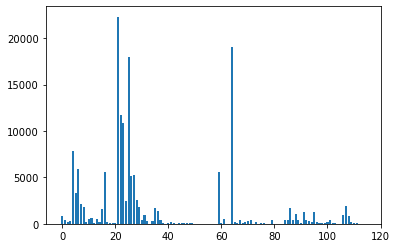

In [16]:
import matplotlib.pyplot as plt

plt.bar(range(len(t1_count)), t1_count.values())

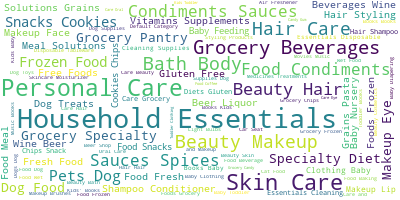

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_trim.category.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


In [10]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
preprocess(df_trim.category.values[0])

['personal', 'care', 'skin', 'care', 'groom', 'shave', 'razor']

In [13]:
df_trim['processed_title'] = df_trim.old_category.map(preprocess)

In [14]:
df_trim.to_csv('df_trim.csv')

In [16]:
processed_title = df_trim.processed_title

dictionary = gensim.corpora.Dictionary(processed_title)

dictionary.filter_extremes(no_below=15, keep_n=1000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_title]

In [17]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [18]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7, id2word=dictionary, passes=2, workers=2)

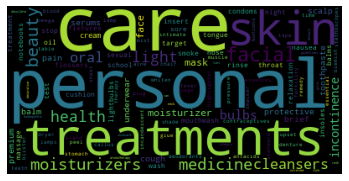

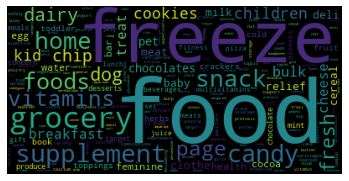

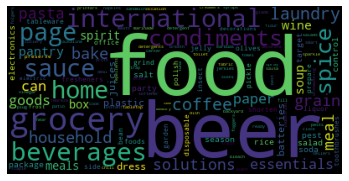

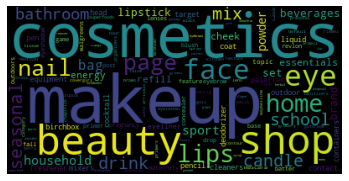

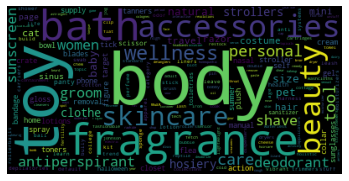

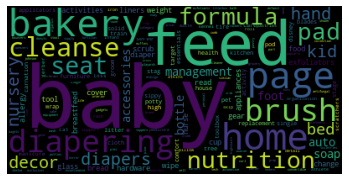

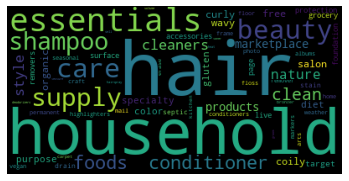

In [20]:
import matplotlib.pyplot as plt
for i in range(7):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model_tfidf.show_topic(i, 200))))
    plt.axis("off")

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
vectorizer.fit(df_trim.category)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [25]:
tfidf_vec = vectorizer.transform(df_trim.category)

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne.fit_transform(tfidf_vec)

array([[ 7.8589835,  1.1386571],
       [ 7.861461 ,  1.135246 ],
       [ 1.1883116, -8.405807 ],
       ...,
       [-3.0006604,  3.5173857],
       [-1.5969514, -1.6986268],
       [ 1.2614388,  3.5075707]], dtype=float32)

In [28]:
from sklearn.cluster import KMeans
clu_model1 = KMeans(n_clusters=7)
clu_model1.fit(tfidf_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

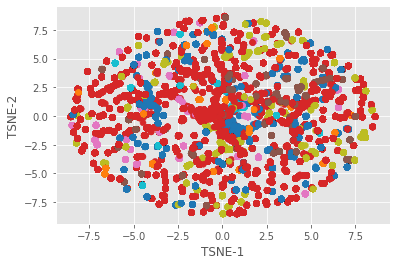

In [31]:
import matplotlib
import matplotlib.colors as mcolors
colors = mcolors.TABLEAU_COLORS.values()
with plt.style.context('ggplot'):
    plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], c = clu_model1.labels_, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel('TSNE-1')
    plt.ylabel('TSNE-2')
    plt.savefig('tsne-tfidf.png')

# Clustering using Bert Sentence Embedding

In [5]:
df_trim = pd.read_csv('df_trim.csv')

In [1]:
import transformers

In [2]:
# BERT sentence embedding using sentence-transformers package

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [18]:
from sklearn.utils import shuffle
df = shuffle(df_trim)

In [19]:
corpus = df.category.values[:10000]
embedded = model.encode(corpus)

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit_transform(embedded)

array([[ 38.15483   , -70.36653   ],
       [-31.612162  ,  47.124817  ],
       [ 44.638874  , -53.00727   ],
       ...,
       [ 17.88404   , -80.79441   ],
       [-78.23214   ,  -0.24529716],
       [ 18.427946  , -14.911316  ]], dtype=float32)

In [23]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=7)
km1.fit(embedded)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

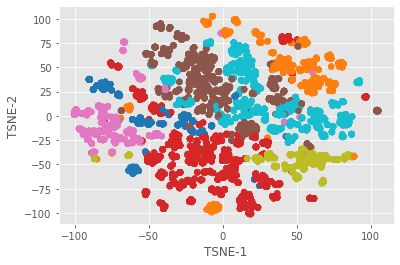

In [24]:
import matplotlib
import matplotlib.colors as mcolors
colors = mcolors.TABLEAU_COLORS.values()
with plt.style.context('ggplot'):
    plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], c = km1.labels_, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel('TSNE-1')
    plt.ylabel('TSNE-2')
    plt.savefig('tsne-tfidf-trim.png')

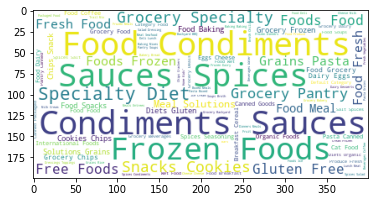

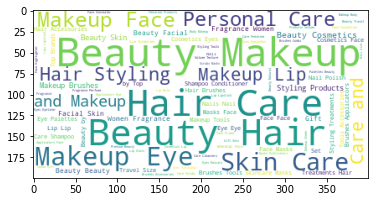

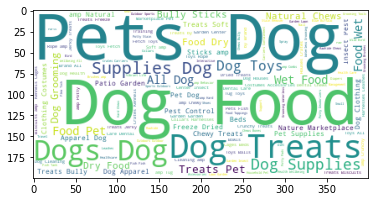

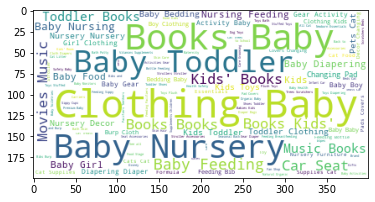

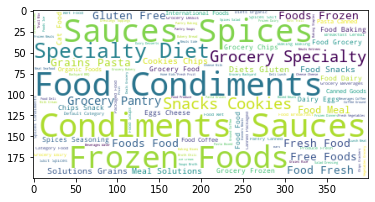

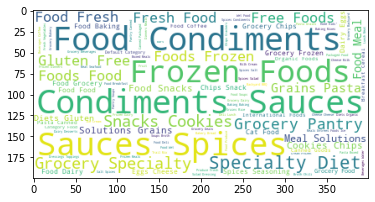

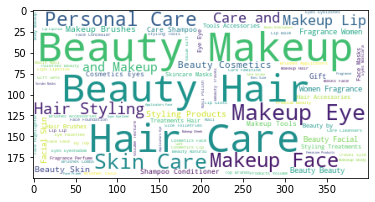

In [27]:
# Import the wordcloud library and visulize the 7 topics

from wordcloud import WordCloud

reduced_df = df.iloc[:10000, :]
reduced_df['label'] = km1.labels_
for i in range(7):
    # Join the different processed titles together.
    long_string = ','.join(list(reduced_df[reduced_df.label==km1.labels_[i]].category.values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    plt.figure()
    plt.imshow(wordcloud)